# Training the model using the preprocessed data

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from utils import save_model
from model_training import get_untrained_custom_model, train_model, get_train_dataset, get_val_dataset, plot_training_history

2024-08-08 10:25:56.587885: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# check_tensorflow()
#making sure the gpu is available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  1


2024-08-08 10:25:57.535065: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-08-08 10:25:59.067034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-08 10:25:59.067077: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-08-08 10:25:59.067124: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-08-08 10:25:59.091293: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-08-08 10:25:59.091401: I tensorflow/str

In [3]:
# Setting up variables and hyperparameters
#variables
model_type = 'custom_untrained'

train_dir = '../datasets/ready/train'
val_dir = '../datasets/ready/val'
save_path = '../models'
image_height = 28
image_width = 28
should_train = True
augmentation = False

# hyperparameter
batch_size = 64
epochs = 16
optimizer='adam'
loss='categorical_crossentropy' 
metrics=['accuracy']

In [4]:
# getting the traing and validation datasets
train_dataset = get_train_dataset(train_dir, batch_size, image_width, image_height, augmentation)
val_dataset = get_val_dataset(val_dir, batch_size, image_width, image_height, augmentation)

Found 49012 files belonging to 10 classes.


2024-08-08 10:26:03.647288: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 10:26:03.650075: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-08 10:26:03.650153: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-08-08 10:26:03.650194: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node

Found 10494 files belonging to 10 classes.


In [5]:
# Getting the model
if model_type == 'custom_untrained':
    model = get_untrained_custom_model(image_width, image_height, optimizer=optimizer, loss=loss, metrics=metrics)

In [6]:
# Training the model
# if should_train == True:
history = train_model(model, train_dataset, epochs, val_dataset)

Epoch 1/16


2024-08-08 10:26:07.269078: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-08 10:26:07.272250: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2495995000 Hz
2024-08-08 10:26:07.822913: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-08-08 10:26:09.276600: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2024-08-08 10:26:11.222650: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-08 10:26:11.222705: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2024-08-08 10:26:11.287676: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-08 10:26:11.287812: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

766/766 [==============================] - 75s 89ms/step - loss: 1.4226 - accuracy: 0.5439 - val_loss: 0.2176 - val_accuracy: 0.9574
Epoch 2/16
766/766 [==============================] - 69s 90ms/step - loss: 0.4090 - accuracy: 0.8839 - val_loss: 0.1165 - val_accuracy: 0.9744
Epoch 3/16
766/766 [==============================] - 70s 91ms/step - loss: 0.2507 - accuracy: 0.9317 - val_loss: 0.0999 - val_accuracy: 0.9796
Epoch 4/16
766/766 [==============================] - 71s 92ms/step - loss: 0.1900 - accuracy: 0.9487 - val_loss: 0.0867 - val_accuracy: 0.9802
Epoch 5/16
766/766 [==============================] - 74s 96ms/step - loss: 0.1542 - accuracy: 0.9596 - val_loss: 0.0795 - val_accuracy: 0.9842
Epoch 6/16
766/766 [==============================] - 72s 93ms/step - loss: 0.1309 - accuracy: 0.9664 - val_loss: 0.0806 - val_accuracy: 0.9824
Epoch 7/16
766/766 [==============================] - 70s 91ms/step - loss: 0.1136 - accuracy: 0.9703 - val_loss: 0.0700 - val_accuracy: 0.9842
Epo

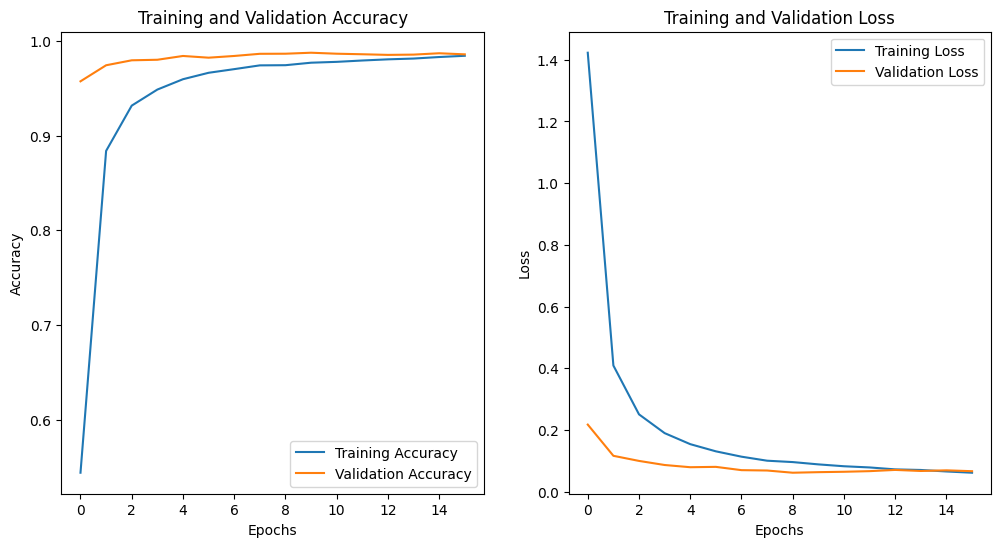

In [7]:
# Ploting training and validation info
plot_training_history(history)

In [8]:
# Saving the model
save_model(model, save_path)

2024-08-08 10:43:42.163195: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/assets
